# Working with a larger example (Multiclass Classification)

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

## Get the data ready - Fashion MNIST dataset

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
# the data has already been split into train, test

(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
#first training example
print(f"First training sample:\n {train_data[0]}\n")
print(f"First training label:\n {train_labels[0]}\n")

First training sample:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   

In [ ]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

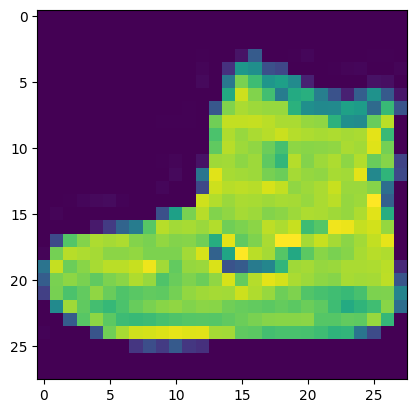

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(train_data[0])


In [ ]:
# create a small list to index on training labels to make them human readable
class_names  = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
len(class_names)

10

Text(0.5, 1.0, 'Bag')

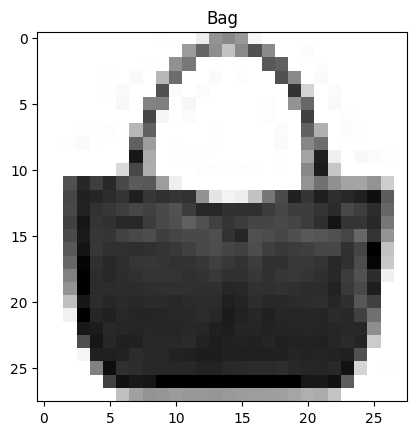

In [ ]:
#plt img and its label
index_of_choice=100
plt.imshow(train_data[index_of_choice], cmap=plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

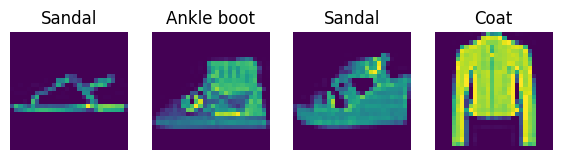

In [ ]:
#plot multiple random images from dataset
import random
plt.figure(figsize=(7,7))
for i in range(4):
  # ax = plt.subplot(2,2,i+1)
  ax = plt.subplot(2,4,i+1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index])
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

## Build a multi-class classification model

1. input shape: 28*28
2. output shape: 10
3. loss func: tf.keras.losses.CategoricalCrossentropy (expects labels in one-hot),
we need sparsecategoricalcrossentropy
4. output act: softmax

In [ ]:
flatten_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28))
])
flatten_model.output_shape

(None, 784)

In [ ]:
#SPARSE LABELS
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # tf.keras.layers.Dense(10, activation="softmax")
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

non_norm_history = model.fit(train_data,
                             train_labels,
                             epochs=10,
                             validation_data=(test_data, test_labels))


Epoch 1/10
1875/1875 [==============================] - 11s 4ms/step - loss: 2.5844 - accuracy: 0.1241 - val_loss: 2.2818 - val_accuracy: 0.1129
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1192 - accuracy: 0.1618 - val_loss: 2.0725 - val_accuracy: 0.1501
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.9905 - accuracy: 0.1963 - val_loss: 1.7793 - val_accuracy: 0.2395
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7352 - accuracy: 0.2548 - val_loss: 1.7113 - val_accuracy: 0.2716
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.6879 - accuracy: 0.2595 - val_loss: 1.6801 - val_accuracy: 0.2597
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6660 - accuracy: 0.2639 - val_loss: 1.6824 - val_accuracy: 0.2749
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6544 - accuracy: 0.2685 - val_loss: 1.6402 - val_accuracy

In [ ]:
model.output_shape

(None, 10)

In [ ]:
#ONE HOT LABELS
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    # tf.keras.layers.Dense(10, activation="softmax")
    tf.keras.layers.Dense(10, activation=tf.keras.activations.softmax)
])

model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

non_norm_history = model.fit(train_data,
                             tf.one_hot(train_labels, depth=10),
                             epochs=10,
                             validation_data=(test_data, tf.one_hot(test_labels, depth=10)))

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 2.4261 - accuracy: 0.1075 - val_loss: 2.2890 - val_accuracy: 0.1076
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 2.2134 - accuracy: 0.1408 - val_loss: 2.1609 - val_accuracy: 0.1703
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1220 - accuracy: 0.1770 - val_loss: 2.0484 - val_accuracy: 0.1983
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9714 - accuracy: 0.2182 - val_loss: 1.9024 - val_accuracy: 0.2425
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 1.8386 - accuracy: 0.2501 - val_loss: 1.8892 - val_accuracy: 0.2578
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.6924 - accuracy: 0.2996 - val_loss: 1.5519 - val_accuracy: 0.3527
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.4860 - accuracy: 0.3883 - val_loss: 1.4286 - val_accuracy:

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_12 (Dense)            (None, 4)                 3140      
                                                                 
 dense_13 (Dense)            (None, 4)                 20        
                                                                 
 dense_14 (Dense)            (None, 10)                50        
                                                                 
Total params: 3210 (12.54 KB)
Trainable params: 3210 (12.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
#check min and max values of training_data
train_data.min(), train_data.max()

(0, 255)

Note: preprocessing includes: turn data into numbers(done), turn data into tensors(done), scale or normalize data, NN prefers normalized/ standardized dta. they like The numbers in the tensors they try to find a patter in  between 0-1.


In [ ]:
train_data_norm = train_data/(255-0)
test_data_norm = test_data/(255-0)

train_data_norm.min(), train_data_norm.max()


(0.0, 1.0)

In [ ]:
tf.random.set_seed(42)
model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

norm_history = model_1.fit(train_data_norm,
                           train_labels,
                           epochs=10,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 1.7706 - accuracy: 0.2724 - val_loss: 1.5845 - val_accuracy: 0.3656
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.3509 - accuracy: 0.4858 - val_loss: 1.0463 - val_accuracy: 0.6165
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.9241 - accuracy: 0.6548 - val_loss: 0.8701 - val_accuracy: 0.6683
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.8264 - accuracy: 0.6823 - val_loss: 0.8183 - val_accuracy: 0.6766
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.7790 - accuracy: 0.7058 - val_loss: 0.7862 - val_accuracy: 0.7140
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7363 - accuracy: 0.7313 - val_loss: 0.7475 - val_accuracy: 0.7196
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7078 - accuracy: 0.7403 - val_loss: 0.7288 - val_accuracy:

## Comparing normalized and non-normalized training curves

In [ ]:
# import pandas as pd
# def plot_loss_curves(history1, history2):
#   plt.figure(figsize=(12,6))
#   plt.subplot(1,2,1)
#   # plt.plot(pd.DataFrame(history1.history))
#   pd.DataFrame(history1.history).plot(title="Non-normalized Data")
#   plt.subplot(1,2,2)
#   # plt.plot(pd.DataFrame(history2.history))
#   # plt.legend()
#   # plt.title("Normalized Data")
#   pd.DataFrame(history2.history).plot(title="Non-normalized Data")


In [ ]:
# plot_loss_curves(non_norm_history, norm_history)

<Axes: title={'center': 'Normalized Data'}>

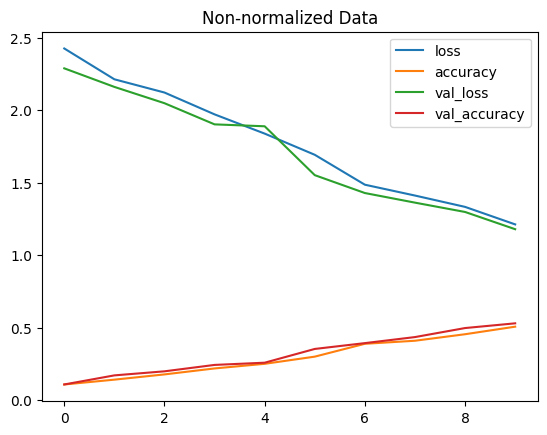

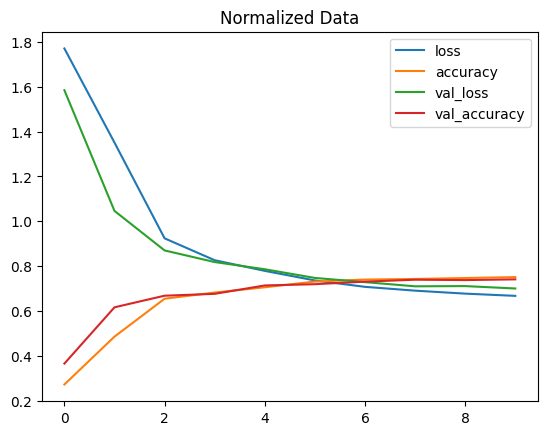

In [ ]:
import pandas as pd
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data")
pd.DataFrame(norm_history.history).plot(title="Normalized Data")

## Finding the ideal learning rate

In [ ]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

#learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))

model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history = model_2.fit(train_data_norm,
            train_labels,
            epochs=40,
            validation_data=(test_data_norm, test_labels),
            callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 7s 3ms/step - loss: 1.2696 - accuracy: 0.5037 - val_loss: 0.8811 - val_accuracy: 0.6777 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.7547 - accuracy: 0.7304 - val_loss: 0.7313 - val_accuracy: 0.7315 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6977 - accuracy: 0.7472 - val_loss: 0.7103 - val_accuracy: 0.7413 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6698 - accuracy: 0.7563 - val_loss: 0.6731 - val_accuracy: 0.7569 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6496 - accuracy: 0.7660 - val_loss: 0.6649 - val_accuracy: 0.7649 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6324 - accuracy: 0.7771 - val_loss: 0.6592 - val_accuracy: 0.7690 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 5s

Text(0.5, 1.0, 'Finding the ideal learning rate')

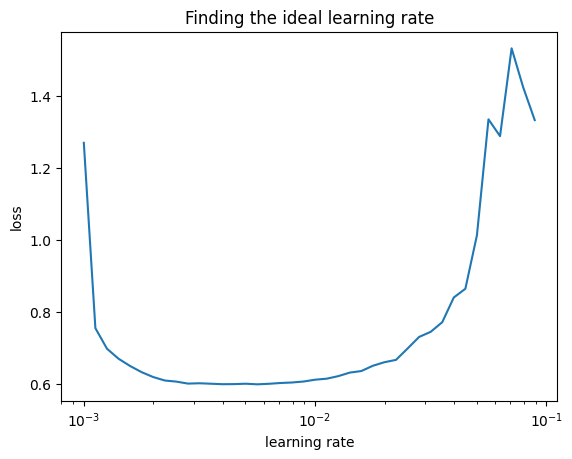

In [67]:
# plot learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, history.history["loss"])
plt.xlabel("learning rate")
plt.ylabel("loss")
plt.title("Finding the ideal learning rate")

1e-3 is the ideal learning rate (Default for Adam)

In [69]:
## More epochs

tf.random.set_seed(42)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

model_3_history = model_3.fit(train_data_norm,
                           train_labels,
                           epochs=40,
                           validation_data=(test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.0781 - accuracy: 0.6031 - val_loss: 0.7494 - val_accuracy: 0.7443
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6929 - accuracy: 0.7608 - val_loss: 0.7383 - val_accuracy: 0.7455
Epoch 3/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.6350 - accuracy: 0.7810 - val_loss: 0.6741 - val_accuracy: 0.7569
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6022 - accuracy: 0.7921 - val_loss: 0.6293 - val_accuracy: 0.7783
Epoch 5/40
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5865 - accuracy: 0.7983 - val_loss: 0.6263 - val_accuracy: 0.7870
Epoch 6/40
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5744 - accuracy: 0.8027 - val_loss: 0.6360 - val_accuracy: 0.7742
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5686 - accuracy: 0.8047 - val_loss: 0.6538 - val_accuracy:

## Evaluating multi-class classification model

1. Confusion matrix
2. Asses some predictions using Visualizations

In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix
import itertools



def make_confusion_matrix(y_true, y_pred, classes=None, figsize = (10,10), text_size=15):
  cm = confusion_matrix(y_true, tf.round(y_pred))
  cm_normalized = cm.astype("float")/cm.sum(axis=1)[:, np.newaxis]
  n_classes = cm.shape[0]

  #prettify it

  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues)
  fig.colorbar(cax)

  if classes:
    labels=classes
  else:
    labels = np.arange(cm.shape[0])

  ax.set(title="Confusion matrix",
        xlabel="Predicted label",
        ylabel="True label",
        xticks=np.arange(n_classes),
        yticks=np.arange(n_classes),
        xticklabels=labels,
        yticklabels=labels)

  #set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  #adjust label size
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(text_size)


  #set the threshold for different colors
  threshold = (cm.max()+cm.min())/2

  #plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j,i, f"{cm[i,j]} ({cm_normalized[i,j]*100:.1f}%",
            horizontalalignment="center",
            color="white" if cm[i,j]>threshold else "black",
            size=text_size)


In [73]:
#make some predictions
y_probs = model_3.predict(test_data_norm)
y_probs[:5]

313/313 [==============================] - 2s 6ms/step


array([[3.5680205e-09, 1.5233192e-04, 9.3008616e-08, 3.8637054e-07,
        1.9796740e-05, 6.2263429e-01, 1.7690681e-07, 2.6975079e-02,
        9.4762316e-04, 3.4927019e-01],
       [9.1228943e-04, 8.0730445e-10, 8.8584483e-01, 9.3133103e-06,
        1.6621122e-02, 0.0000000e+00, 9.6612431e-02, 9.2420230e-38,
        1.9541178e-09, 0.0000000e+00],
       [3.7986294e-09, 9.9961156e-01, 1.4757957e-05, 2.0821716e-04,
        1.6518398e-04, 2.4602438e-17, 4.2530239e-08, 2.7151648e-07,
        2.9135325e-09, 3.8658894e-09],
       [2.3168056e-10, 9.9978995e-01, 5.0013551e-07, 2.0823623e-04,
        9.6854444e-07, 3.1417987e-20, 2.2074964e-10, 1.6477468e-07,
        2.2007792e-13, 1.0756217e-07],
       [3.2251528e-01, 7.1525217e-05, 1.5633214e-01, 6.7525789e-02,
        2.7441815e-02, 2.0710934e-16, 4.2581430e-01, 7.4381097e-15,
        2.9921898e-04, 1.6248096e-21]], dtype=float32)

In [74]:
y_probs[0], tf.argmax(y_probs[0]), class_names[tf.argmax(y_probs[0])]

(array([3.5680205e-09, 1.5233192e-04, 9.3008616e-08, 3.8637054e-07,
        1.9796740e-05, 6.2263429e-01, 1.7690681e-07, 2.6975079e-02,
        9.4762316e-04, 3.4927019e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=5>,
 'Sandal')

In [75]:
y_probs= tf.argmax(y_probs, axis=1)
y_probs[:5]

<tf.Tensor: shape=(5,), dtype=int64, numpy=array([5, 2, 1, 1, 6])>

In [77]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_labels, y_probs)

array([[793,   0,   5,  98,   4,   2,  86,   0,  10,   2],
       [  2, 943,   8,  37,   5,   0,   2,   0,   1,   2],
       [ 27,   2, 645,  36, 129,   0, 155,   0,   6,   0],
       [ 61,  15,  21, 827,  22,   4,  42,   0,   8,   0],
       [  1,   7, 164,  32, 655,   0, 126,   0,  15,   0],
       [  0,   0,   0,   2,   0, 922,   0,  35,   8,  33],
       [200,   2, 102,  72,  90,   0, 509,   0,  24,   1],
       [  0,   0,   0,   0,   0,  42,   0, 945,   0,  13],
       [  8,   1,   0,   6,  11,  21,  47,   5, 901,   0],
       [  0,   0,   0,   1,   0,  42,   0,  61,   1, 895]])

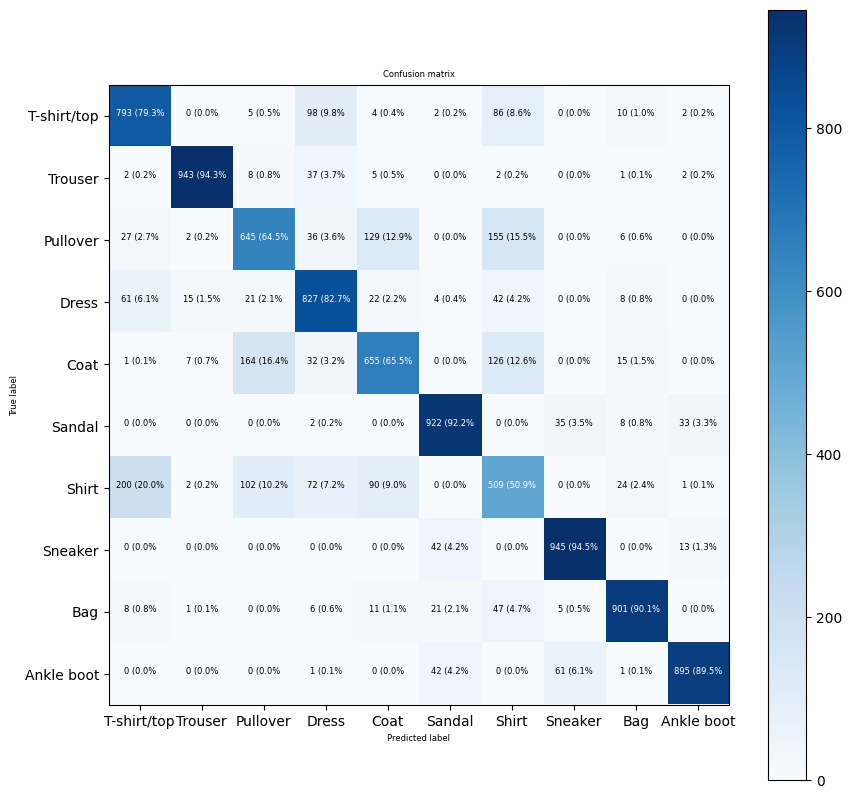

In [81]:
make_confusion_matrix(y_true=test_labels,
                      y_pred=y_probs,
                      classes=class_names,
                      text_size=6)

### Visualizing random Model predictions

In [85]:
import random

def plot_random_image(model, images, true_labels, classes):
  """
  Picks a random image, plots it and labels it with a prediction and truth label.
  """

  i = random.randint(0, len(images)-1)
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image)
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  plt.xlabel(f"Pred: {pred_label} {100*pred_probs.max():2.0f}% True: {true_label}", color=color)

1/1 [==============================] - 0s 47ms/step


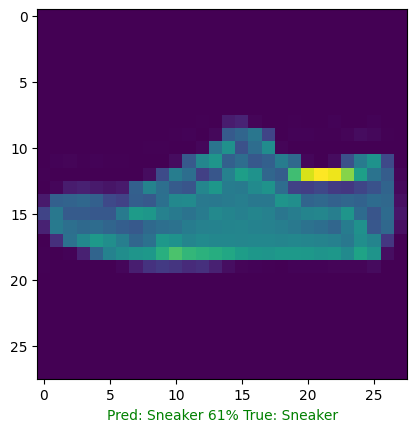

In [92]:
plot_random_image(model_3, test_data_norm, test_labels, class_names) ###take case of data! norm data!!!!!

## What patterns is the model learning

In [93]:
# Find the layers of the model
model_3.layers

In [94]:
# Extract a particular layer
model_3.layers[1]

In [95]:
#Get the patterns of a layer in our network

weights, biases = model_3.layers[1].get_weights()
weights, weights.shape

(array([[-9.2659187e-01, -5.2499837e-01,  1.1947728e+00, -4.7201656e-02],
        [-5.6587994e-01, -5.0806284e-01,  1.3998151e-01, -8.0444746e-02],
        [-1.0074946e+00, -1.9748684e+00,  1.5033642e+00, -2.3234113e-01],
        ...,
        [-3.7482968e-01,  1.3261537e-01, -5.3614814e-02,  5.6143035e-05],
        [ 9.9005766e-02,  5.0774419e-01, -8.2987505e-01,  2.5359023e-01],
        [-1.1463128e+00, -7.6377720e-01,  9.1510481e-01,  7.0687258e-01]],
       dtype=float32),
 (784, 4))

In [96]:
biases, biases.shape

(array([1.5796613 , 0.74213856, 1.7619692 , 2.215158  ], dtype=float32), (4,))

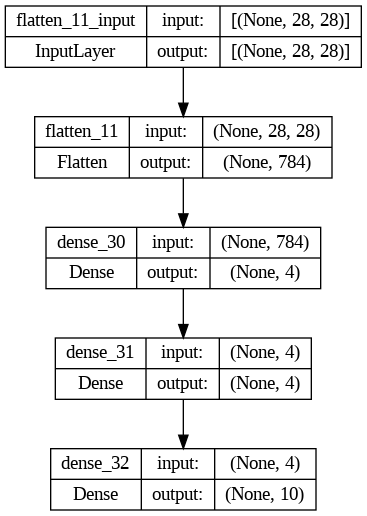

In [100]:
from tensorflow.keras.utils import plot_model
plot_model(model_3, show_shapes=True)